In [21]:
import tensorflow as st
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import pathlib
import matplotlib.image as img
import imageio
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *

In [22]:
#read dataset
path = pathlib.Path('/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images')


In [23]:
#read two data folders
Parasitized = list(path.glob('Parasitized/*'))
Uninfected = list(path.glob('Uninfected/*'))
data = {
    'Parasitized' : Parasitized,
    'Uninfected' : Uninfected
}

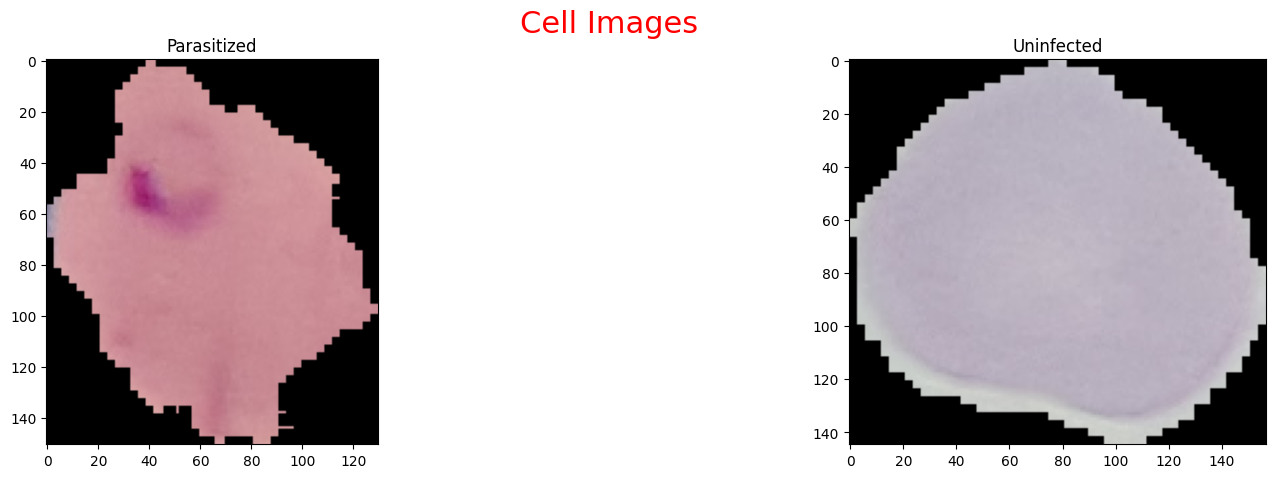

In [24]:
fig,ax = plt.subplots(ncols = 2, figsize = (20,5))
fig.suptitle('Cell Images', color = 'red', fontsize = 22)

Parasitized_img = img.imread(Parasitized[0])
Uninfected_img = img.imread(Uninfected[0])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)
    
ax[0].imshow(Parasitized_img)
ax[1].imshow(Uninfected_img)

In [25]:
data_generator=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [26]:
train_gen = data_generator.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [27]:
test_gen = data_generator.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [38]:
#CNN Model
model = Sequential()

#add Conv layer with filters, kernel, padding, activation, input shape
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [128,128,3])) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#add batch normalization layer
model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())
model.add(Dropout(0.3))

#add batch normalization layer
model.add(BatchNormalization())

#add Conv layer with filters, kernel, padding, activation
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu')) #feature extraction

#add pooling layer ---> dimensionality reduction 
model.add(MaxPooling2D())
model.add(Dropout(0.4))

#add Flatten layer ---> 1D
model.add(Flatten())

#add Fully Connnected Layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,304,705 (16.42 MB)

 Trainable params: 4,304,513 (16.42 MB)

 Non-trainable params: 192 (768.00 B)

In [40]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

history = model.fit(train_gen,
                    epochs =5,
                    validation_data = test_gen,
                    callbacks=[early_stop])#fit model


Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 499s 719ms/step - accuracy: 0.7269 - loss: 1.0243 - val_accuracy: 0.9352 - val_loss: 0.2364
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 494s 716ms/step - accuracy: 0.9355 - loss: 0.2161 - val_accuracy: 0.9423 - val_loss: 0.1820
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 497s 709ms/step - accuracy: 0.9496 - loss: 0.1665 - val_accuracy: 0.9338 - val_loss: 0.1861
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 490s 710ms/step - accuracy: 0.9510 - loss: 0.1569 - val_accuracy: 0.9372 - val_loss: 0.1995
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 496s 718ms/step - accuracy: 0.9560 - loss: 0.1406 - val_accuracy: 0.9426 - val_loss: 0.1666


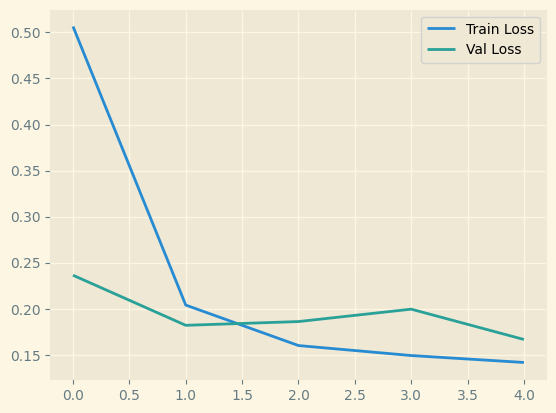

In [42]:
#visualization for loss
plt.style.use('Solarize_Light2') 
plt.plot(history.history['loss'] , label='Train Loss')
plt.plot(history.history['val_loss'] , label='Val Loss')
plt.legend()
plt.show()

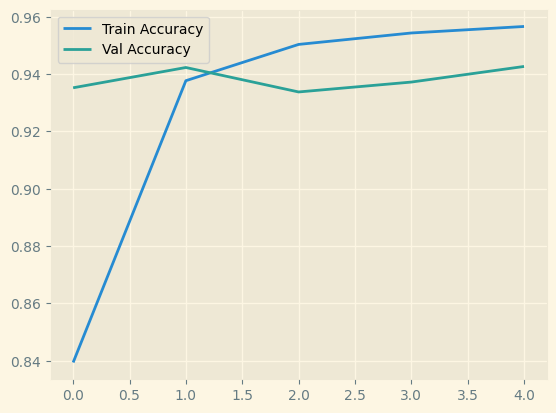

In [43]:
#visualization for loss
plt.style.use('Solarize_Light2') 
plt.plot(history.history['accuracy'] , label='Train Accuracy')
plt.plot(history.history['val_accuracy'] , label='Val Accuracy')
plt.legend()
plt.show()